In [1]:
import cv2
from cv2 import sqrt
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics


In [2]:
def DeleteTrash(pathTxtFile):
    with open (pathTxtFile, 'r') as f:
        old_data = f.read()
        new_data = old_data.replace('[', '')
        new_data = new_data.replace(']', '')
        new_data = new_data.replace(',', '')
        new_data = new_data.replace(';', '')
        new_data = new_data.replace('(', '')
        new_data = new_data.replace(')', '')
    with open (pathTxtFile, 'w') as f:
        f.write(new_data)

In [4]:
DeleteTrash(r"./BallDetectorLog48video.txt") 
FindCord = np.loadtxt(r"./BallDetectorLog48video.txt")

BlenderCord = np.loadtxt(r"./LogBlenderCoordVideo48.txt", delimiter=',')
#BlenderCord[:,2] = BlenderCord[:,2] +  0.05

if (FindCord.shape != BlenderCord.shape):
    print("Error dementions")
    print(FindCord.shape)
    print(BlenderCord.shape)
    
cameraMatrix = np.array( [ 
    [2666.6666666666665, 0, 960.0],
    [0, 2666.6666666666665, 540.0], 
    [0, 0, 1] 
    ] )
cameraMatrixV2 = np.array( [
    [2666.6666666666665, 0, 959.5],
    [0, 2666.6666666666665, 539.5], 
    [0, 0, 1] 
    ] )
distCoeffs = np.array( [ 0.0,0.0,0.0,0.0 ] )
Rx = np.array([
    [ -1.0, 0.0, 0.0],
    [ 0.0, -1.0, 0.0],
    [ 0.0, 0.0, 1.0] 
    ])# Rotation matrix
T = np.array([ 0.0, 0.0, 0.0]) #Transpose matrix

rvecR, jacobianRotation = cv2.Rodrigues(Rx)

In [ ]:
def ErrorEstimation(FindCord, BlenderCord, rvecR, T, cameraMatrix, distCoeffs, draw=False):
    xFindCord = FindCord[:,0] - BlenderCord[:,0]
    yFindCord = FindCord[:,1] - BlenderCord[:,1]
    zFindCord = FindCord[:,2] - BlenderCord[:,2]

    imageFindPoint, jacobianProjectFind = cv2.projectPoints(FindCord, rvecR, T, cameraMatrix, distCoeffs)
    imageBlenderPoint, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)
    pixelError = imageBlenderPoint - imageFindPoint
    xErrorValuesPx = pixelError[:,0,0]
    yErrorValuesPx = pixelError[:,0,1]

    print ("xyz Real cordinate mean: ")
    print (np.mean(xFindCord))
    print (np.mean(yFindCord))
    print (np.mean(zFindCord))
    print("------------------")
    print("Px cordinate mean")
    print(np.mean(xErrorValuesPx))
    print(np.mean(yErrorValuesPx))

    print ("Statistics mean:  ", statistics.mean(xErrorValuesPx), " error in px " ) 
    Sigma = statistics.stdev(xErrorValuesPx)
    print ("Statistics stdev:  ", Sigma, " error in px" )
    if draw:
        plt.plot(xFindCord, label = 'x error')
        plt.plot(yFindCord, label = "y error")
        plt.plot(zFindCord, label = "z error")
        plt.legend()
        plt.xlabel('Frame')
        plt.ylabel('Error in meters')
        plt.title(" Real cordinate error")
        plt.show()

        plt.plot(xErrorValuesPx, label = "X px error")
        plt.plot(yErrorValuesPx, label = "Y px error")
        plt.xlabel('Frame')
        plt.ylabel('Error in px')
        plt.legend()
        plt.show()
        


## Some results

- кек
- bek

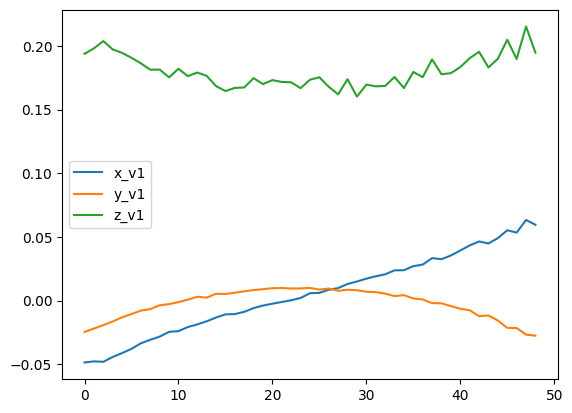

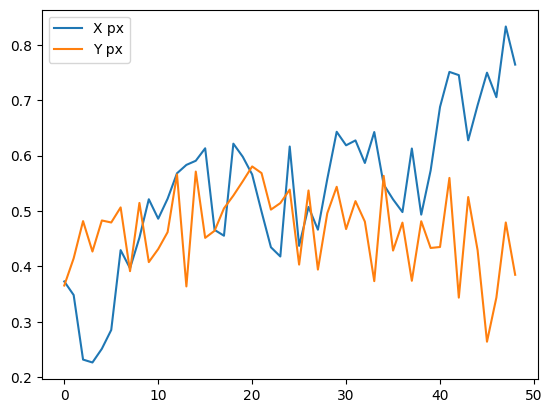

xyz Real cordinate mean: 
0.026489698462960492
0.009290198165278096
0.18006153061224514
------------------
Px cordinate mean
0.5396883698310633
0.4656301588999032


In [6]:
imageFindPoint, jacobianProjectFind = cv2.projectPoints(FindCord, rvecR, T, cameraMatrix, distCoeffs)
imageBlenderPoint, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)

pixelError = imageBlenderPoint - imageFindPoint
xValuesPx = pixelError[:,0,0]
yValuesPx = pixelError[:,0,1]

xFindCord = FindCord[:,0] - BlenderCord[:,0]
yFindCord = FindCord[:,1] - BlenderCord[:,1]
zFindCord = FindCord[:,2] - BlenderCord[:,2]

plt.plot(xFindCord, label = 'x_v1')
plt.plot(yFindCord, label = "y_v1")
plt.plot(zFindCord, label = "z_v1")
plt.legend()
plt.show()

plt.plot(xValuesPx, label = "X px")
plt.plot(yValuesPx, label = "Y px")
plt.legend()
plt.show()

print ("xyz Real cordinate mean: ")
print (np.mean(abs(xFindCord)))
print (np.mean(abs(yFindCord)))
print (np.mean(abs(zFindCord)))
print("------------------")
print("Px cordinate mean")
print(np.mean(abs(xValuesPx)))
print(np.mean(abs(yValuesPx)))

In [11]:
DeleteTrash(r"./BallDetectorLog48video959CameraMatrix.txt") 
FindCordV2 = np.loadtxt(r"./BallDetectorLog48video959CameraMatrix.txt")

xFindCordErrorV2 = FindCordV2[:,0] - BlenderCord[:,0]
yFindCordErrorV2 = FindCordV2[:,1] - BlenderCord[:,1]
zFindCordErrorV2 = FindCordV2[:,2] - BlenderCord[:,2]

imageFindPointV2, jacobianProjectFind = cv2.projectPoints(FindCordV2, rvecR, T, cameraMatrixV2, distCoeffs)
imageBlenderPointV2, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrixV2, distCoeffs)
pixelErrorV2 = imageBlenderPointV2 - imageFindPointV2
xValuesPxErrorV2 = pixelErrorV2[:,0,0]
yValuesPxErrorV2 = pixelErrorV2[:,0,1]


print (np.mean(abs(xFindCordErrorV2)))
print (np.mean(abs(yFindCordErrorV2)))
print (np.mean(abs(zFindCordErrorV2)))
print("------------------")
print(np.mean(abs(xValuesPxErrorV2)))
print(np.mean(abs(yValuesPxErrorV2)))

0.026564851457806307
0.009693007344421306
0.18037767346938766
------------------
0.12450336352331269
0.060911504398546285


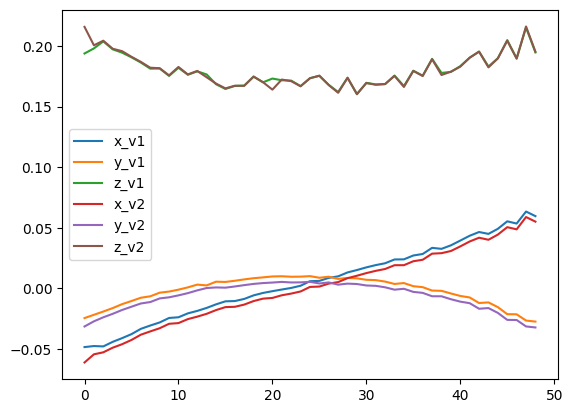

In [12]:
plt.plot(xFindCord, label = 'x_v1')
plt.plot(yFindCord, label = "y_v1")
plt.plot(zFindCord, label = "z_v1")

plt.plot(xFindCordErrorV2, label = 'x_v2')
plt.plot(yFindCordErrorV2, label = "y_v2")
plt.plot(zFindCordErrorV2, label = "z_v2")

plt.legend()
plt.show()



In [19]:
print(np.mean(abs(xFindCordErrorV2) - abs(xFindCord)))
print(np.mean(abs(yFindCordErrorV2) - abs(yFindCord)))
print(np.mean(abs(zFindCordErrorV2) - abs(zFindCord)))
print("----------------")
print()

7.51529948458134e-05
0.0004028091791432095
0.00031614285714251115
----------------


0.026287876013980933
0.009292153675482164
0.17944516326530638
------------------
0.5340179077184644
0.45930411829016643


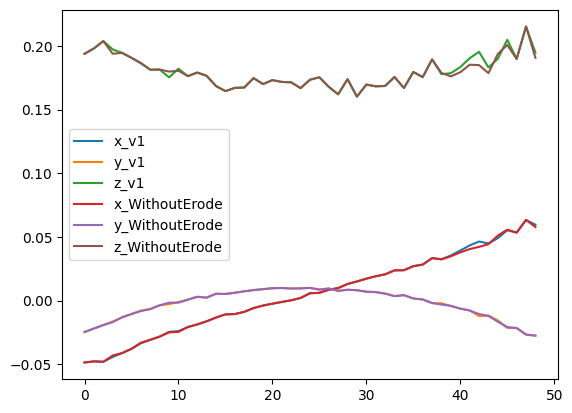

In [26]:
DeleteTrash(r"./BallDetectorLog48videoWithotErode.txt") 
FindCordV2 = np.loadtxt(r"./BallDetectorLog48videoWithotErode.txt")

xFindCordErrorV2 = FindCordV2[:,0] - BlenderCord[:,0]
yFindCordErrorV2 = FindCordV2[:,1] - BlenderCord[:,1]
zFindCordErrorV2 = FindCordV2[:,2] - BlenderCord[:,2]

imageFindPointV2, jacobianProjectFind = cv2.projectPoints(FindCordV2, rvecR, T, cameraMatrix, distCoeffs)
imageBlenderPointV2, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)
pixelErrorV2 = imageBlenderPointV2 - imageFindPointV2
xValuesPxErrorV2 = pixelErrorV2[:,0,0]
yValuesPxErrorV2 = pixelErrorV2[:,0,1]


print (np.mean(abs(xFindCordErrorV2)))
print (np.mean(abs(yFindCordErrorV2)))
print (np.mean(abs(zFindCordErrorV2)))
print("------------------")
print(np.mean(abs(xValuesPxErrorV2)))
print(np.mean(abs(yValuesPxErrorV2)))

'''
xyz Real cordinate mean: 
0.026489698462960492
0.009290198165278096
0.18006153061224514 

Px cordinate mean
0.5396883698310633
0.4656301588999032
'''

plt.plot(xFindCord, label = 'x_v1')
plt.plot(yFindCord, label = "y_v1")
plt.plot(zFindCord, label = "z_v1")

plt.plot(xFindCordErrorV2, label = 'x_WithoutErode')
plt.plot(yFindCordErrorV2, label = "y_WithoutErode")
plt.plot(zFindCordErrorV2, label = "z_WithoutErode")

plt.legend()
plt.show()

In [24]:
DeleteTrash(r"./BallDetectorLog48videoWithSomeErode.txt") 
FindCordV2 = np.loadtxt(r"./BallDetectorLog48videoWithSomeErode.txt")

xFindCordErrorV2 = FindCordV2[:,0] - BlenderCord[:,0]
yFindCordErrorV2 = FindCordV2[:,1] - BlenderCord[:,1]
zFindCordErrorV2 = FindCordV2[:,2] - BlenderCord[:,2]

imageFindPointV2, jacobianProjectFind = cv2.projectPoints(FindCordV2, rvecR, T, cameraMatrix, distCoeffs)
imageBlenderPointV2, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)
pixelErrorV2 = imageBlenderPointV2 - imageFindPointV2
xValuesPxErrorV2 = pixelErrorV2[:,0,0]
yValuesPxErrorV2 = pixelErrorV2[:,0,1]


print (np.mean(abs(xFindCordErrorV2)))
print (np.mean(abs(yFindCordErrorV2)))
print (np.mean(abs(zFindCordErrorV2)))
print("------------------")
print(np.mean(abs(xValuesPxErrorV2)))
print(np.mean(abs(yValuesPxErrorV2)))

'''
xyz Real cordinate mean: 
0.026489698462960492
0.009290198165278096
0.18006153061224514 

Px cordinate mean
0.5396883698310633
0.4656301588999032
'''

0.02631910866704214
0.009292424695890327
0.17949793877551043
------------------
0.5376109522903963
0.46056854598294206


'\nxyz Real cordinate mean: \n0.026489698462960492\n0.009290198165278096\n0.18006153061224514 \n\nPx cordinate mean\n0.5396883698310633\n0.4656301588999032\n'

In [27]:
DeleteTrash(r"./BallDetectorLog48videoCycles.txt") 
FindCordV2 = np.loadtxt(r"./BallDetectorLog48videoCycles.txt")

xFindCordErrorV2 = FindCordV2[:,0] - BlenderCord[:,0]
yFindCordErrorV2 = FindCordV2[:,1] - BlenderCord[:,1]
zFindCordErrorV2 = FindCordV2[:,2] - BlenderCord[:,2]

imageFindPointV2, jacobianProjectFind = cv2.projectPoints(FindCordV2, rvecR, T, cameraMatrix, distCoeffs)
imageBlenderPointV2, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)
pixelErrorV2 = imageBlenderPointV2 - imageFindPointV2
xValuesPxErrorV2 = pixelErrorV2[:,0,0]
yValuesPxErrorV2 = pixelErrorV2[:,0,1]


print (np.mean(abs(xFindCordErrorV2)))
print (np.mean(abs(yFindCordErrorV2)))
print (np.mean(abs(zFindCordErrorV2)))
print("------------------")
print(np.mean(abs(xValuesPxErrorV2)))
print(np.mean(abs(yValuesPxErrorV2)))

'''
xyz Real cordinate mean: 
0.026489698462960492
0.009290198165278096
0.18006153061224514 

Px cordinate mean
0.5396883698310633
0.4656301588999032



-------------------------

without erode 

0.026287876013980933
0.009292153675482164
0.17944516326530638
------------------
0.5340179077184644
0.45930411829016643
'''

0.016843441227203656
0.006127502820716177
0.11943361224489807
------------------
0.49837790928493825
0.502474778455837


'\nxyz Real cordinate mean: \n0.026489698462960492\n0.009290198165278096\n0.18006153061224514 \n\nPx cordinate mean\n0.5396883698310633\n0.4656301588999032\n\n\n\n-------------------------\n\nwithout erode \n\n0.026287876013980933\n0.009292153675482164\n0.17944516326530638\n------------------\n0.5340179077184644\n0.45930411829016643\n'

In [28]:
#With old ColorExample for Cilor filter

DeleteTrash(r"./BallDetectorLog48videoCyclesOldColor.txt") 
FindCordV2 = np.loadtxt(r"./BallDetectorLog48videoCyclesOldColor.txt")

xFindCordErrorV2 = FindCordV2[:,0] - BlenderCord[:,0]
yFindCordErrorV2 = FindCordV2[:,1] - BlenderCord[:,1]
zFindCordErrorV2 = FindCordV2[:,2] - BlenderCord[:,2]

imageFindPointV2, jacobianProjectFind = cv2.projectPoints(FindCordV2, rvecR, T, cameraMatrix, distCoeffs)
imageBlenderPointV2, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)
pixelErrorV2 = imageBlenderPointV2 - imageFindPointV2
xValuesPxErrorV2 = pixelErrorV2[:,0,0]
yValuesPxErrorV2 = pixelErrorV2[:,0,1]


print (np.mean(abs(xFindCordErrorV2)))
print (np.mean(abs(yFindCordErrorV2)))
print (np.mean(abs(zFindCordErrorV2)))
print("------------------")
print(np.mean(abs(xValuesPxErrorV2)))
print(np.mean(abs(yValuesPxErrorV2)))

'''
xyz Real cordinate mean: 
0.026489698462960492
0.009290198165278096
0.18006153061224514 

Px cordinate mean
0.5396883698310633
0.4656301588999032



-------------------------

without erode 

0.026287876013980933
0.009292153675482164
0.17944516326530638
------------------
0.5340179077184644
0.45930411829016643
--------------------
new color example 

0.016843441227203656
0.006127502820716177
0.11943361224489807
------------------
0.49837790928493825
0.502474778455837
'''

0.02477553935275648
0.008666462755100657
0.17818063265306117
------------------
0.49207766376545636
0.4913403933011771


'\nxyz Real cordinate mean: \n0.026489698462960492\n0.009290198165278096\n0.18006153061224514 \n\nPx cordinate mean\n0.5396883698310633\n0.4656301588999032\n\n\n\n-------------------------\n\nwithout erode \n\n0.026287876013980933\n0.009292153675482164\n0.17944516326530638\n------------------\n0.5340179077184644\n0.45930411829016643\n'

In [ ]:
print ("Statistics mean:  ", statistics.mean(NormX), " error in px " ) 
Sigma = statistics.stdev(NormX)
print ("Statistics stdev:  ", Sigma, " error in px" )
print (NormX)
